<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Бахтияр! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 3</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</span>

# HR-аналитика компании «Работа с заботой».

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

**Цель проекта №1**: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

**Цель проекта №2**: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных**:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Ход исследования**:

**Модель по предсказанию уровня удовлетворённости сотрудника**:
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Подготовка данных
5. Обучение моделей
6. Промежуточные выводы

**Модель по предсказанию увольнения сотрудника из компании**:
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Добавление нового входного признака
5. Подготовка данных
6. Обучение моделей
6. Выводы

In [1]:
#!pip install optuna optuna-integration -q
!pip install scikit-learn -U -q
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    RobustScaler
)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import shap
from sklearn.feature_selection import SelectKBest, f_classif

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Загрузка данных

In [ ]:
test_features = pd.read_csv('/data/task1/test_features.csv')

train_satisfaction_rate = pd.read_csv('/data/task1/train_job_satisfaction_rate.csv')
target_satisfaction_rate = pd.read_csv('/data/task1/test_target_job_satisfaction_rate.csv')

train_quit = pd.read_csv('/data/task2/train_quit.csv')
target_quit = pd.read_csv('/data/task2/test_target_quit.csv')

In [4]:
display(test_features.head(10))
test_features.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info выведет информацию и без print, print, в данном случае, печатает только слово None в аутпутах.
</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [5]:
display(train_satisfaction_rate.head(10))
train_satisfaction_rate.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [6]:
display(target_satisfaction_rate.head(10))
target_satisfaction_rate.info()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [7]:
display(train_quit.head(10))
train_quit.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [8]:
display(target_quit.head(10))
target_quit.info()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Загрузили предоставленные данные. Таблицы test_features, train_satisfaction_rate и target_satisfaction_rate используем для модели по предсказанию уровня удовлетворённости сотрудника. А таблицы train_quit и target_quit наряду с test_features с предсказанными данными от предыдущей модели используем для модели по предсказанию увольнения сотрудника из компании.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Предоброботка данных

### Проверка дубликатов

In [9]:
# Проверка дубликатов
print('test_features:', test_features.duplicated().sum())
print('train_satisfaction_rate:', train_satisfaction_rate.duplicated().sum())
print('target_satisfaction_rate:', target_satisfaction_rate.duplicated().sum())
print('train_quit:', train_quit.duplicated().sum())
print('target_quit:', target_quit.duplicated().sum())

test_features: 0
train_satisfaction_rate: 0
target_satisfaction_rate: 0
train_quit: 0
target_quit: 0


### Проверка пропусков

In [10]:
# Подсчет количества пропусков
print('test_features:\n', test_features.isna().sum())
print('---------------------------------------------------')
print('train_satisfaction_rate:\n', train_satisfaction_rate.isna().sum())
print('---------------------------------------------------')
print('target_satisfaction_rate:\n', target_satisfaction_rate.isna().sum())
print('---------------------------------------------------')
print('train_quit:\n', train_quit.isna().sum())
print('---------------------------------------------------')
print('target_quit:\n', target_quit.isna().sum())

test_features:
 id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
---------------------------------------------------
train_satisfaction_rate:
 id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
---------------------------------------------------
target_satisfaction_rate:
 id                       0
job_satisfaction_rate    0
dtype: int64
---------------------------------------------------
train_quit:
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo      

В таблицах test_features и train_satisfaction_rate есть в пропуски в столбцах dept и level. Учтем их в работе с моделями через piplene.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ данных №1

In [11]:
# Функция для вывода графиков числовых признаков
def graph_numeric(df, col, bins=30):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=bins, kde=True)
    plt.axvline(df[col].median(), color='r', linestyle='--', label='Median')
    plt.axvline(df[col].mean(), color='g', linestyle='-', label='Mean')
    plt.title(f'Histogram of {col}')
    plt.legend()

    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()
    print(df[col].describe())
    

def graph_discrete(df, col):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Столбчатая диаграмма
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Добавление подписей данных на столбчатую диаграмму
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Подготовка данных для круговой диаграммы
    value_counts = df[col].value_counts()
    top_5 = value_counts.nlargest(5)
    others = value_counts.iloc[5:].sum()
    pie_data = top_5.append(pd.Series(others, index=['Others']))

    # Круговая диаграмма
    plt.subplot(1, 2, 2)
    pie_data.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

    plt.show()
    print(df[col].describe())

# Функция дял вывода графиков категориальных признаков
def graph_cat(df, col):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 5))

    # Вывод уникальных значений
    unique_values = df[col].unique()
    print(f'Уникальные значения в столбце {col}: {unique_values}')

    # Построение диаграммы
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title(f'Pie Chart of {col}')
    plt.show()

    print(df[col].describe())

### Test features

Уникальные значения в столбце dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']


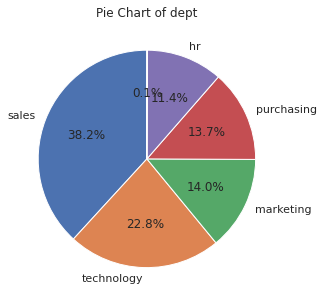

count      1998
unique        6
top       sales
freq        763
Name: dept, dtype: object


In [12]:
graph_cat(test_features, 'dept')

В компании 5 отделов. График показывает, что отдел продаж является самым крупным отделом с более 38% работниками. Наименшее количество сотрудников работают в отделе hr - 11.4%. Также можем видеть промуски в данных 0.1%.

Уникальные значения в столбце level: ['junior' 'middle' 'sinior' nan]


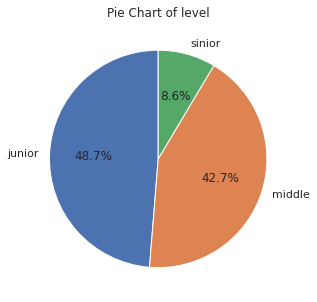

count       1999
unique         3
top       junior
freq         974
Name: level, dtype: object


In [13]:
graph_cat(test_features, 'level')

В компании 3 уровни должности: junior, middle и senior. Почти половина сотрудников - 48.7% являются junior-специалистами. Немного меньше - 42.7% middle-специалистов. Senior специалистов всего 8.6%.

Уникальные значения в столбце workload: ['medium' 'low' 'high' ' ']


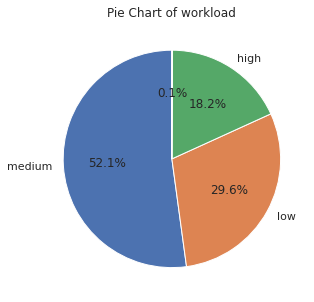

count       2000
unique         4
top       medium
freq        1043
Name: workload, dtype: object


In [14]:
graph_cat(test_features, 'workload')

Также есть 3 уровня загруженности сотрудника. Более половины сотрудников имеют среднюю загружинность. 29.6% имеют низкую загруженность, а 18.2% высокую.

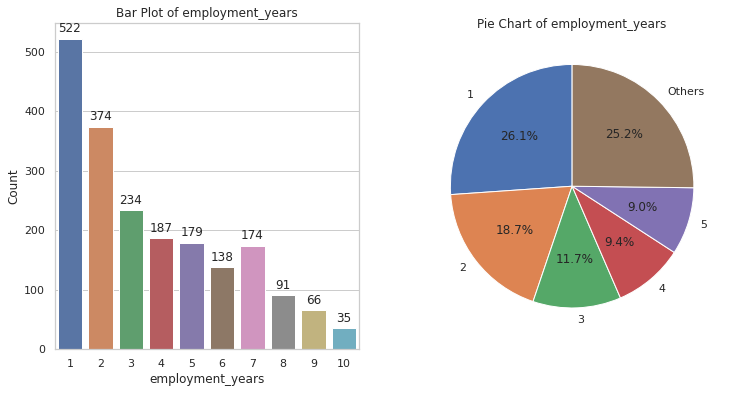

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [15]:
graph_discrete(test_features, 'employment_years')

На графике видно, что количество новых сотрудников значительно больше, чем количество сотрудников с большим стажем работы. По мере увеличения стажа количество сотрудников уменьшается. Это может указывать на высокую текучесть кадров или на то, что компания активно нанимает новых сотрудников, но не все остаются на длительный срок.

Особенно заметен пик на 7 годах работы, возможно, компания проводила активный набор сотрудников, что привело к большому количеству новых работников в тот период.

Уникальные значения в столбце last_year_promo: ['no' 'yes']


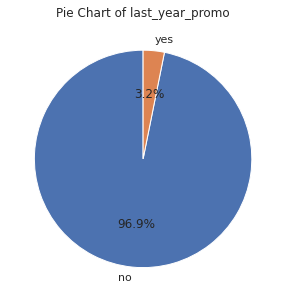

count     2000
unique       2
top         no
freq      1937
Name: last_year_promo, dtype: object


In [16]:
graph_cat(test_features, 'last_year_promo')

График показывает распределение сотрудников по признаку, было ли повышение за последний год. Только 3.2% сотрудников получили повышение за последний год.

Уникальные значения в столбце last_year_violations: ['no' 'yes']


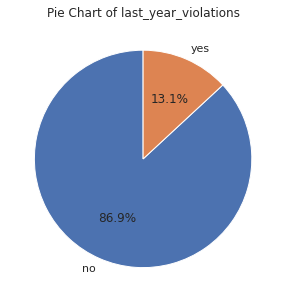

count     2000
unique       2
top         no
freq      1738
Name: last_year_violations, dtype: object


In [17]:
graph_cat(test_features, 'last_year_violations')

График показывает распределение сотрудников по признаку, нарушал ли сотрудник трудовой договор за последний год: 13.1% сотрудников нарушили.

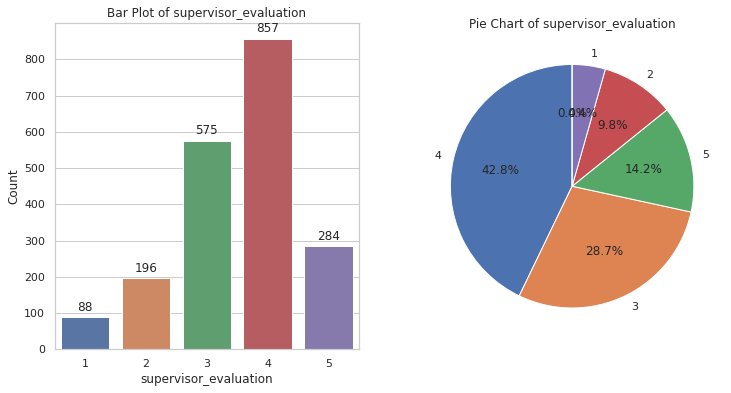

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [18]:
graph_discrete(test_features, 'supervisor_evaluation')

График показывает распределение сотрудников по оценки качества работы, которую дал руководитель. Большинство сотрудников имеют оценки 4 и 3 - 42.8% и 28,7% соответсвенно. Наименьшее количество сотрудников с оченкой 1 - меньше 1%.

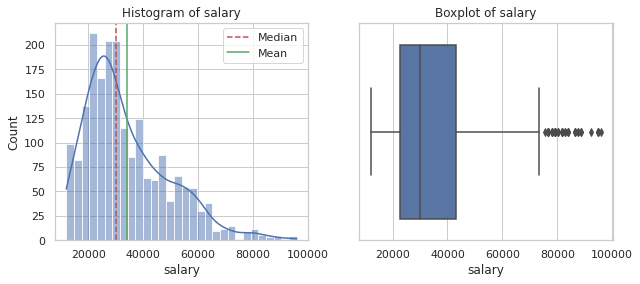

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [19]:
graph_numeric(test_features, 'salary')

In [20]:
# Устраняем опечатку
test_features.loc[test_features['level'] == 'sinior', 'level'] = 'senior'

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>  ~~Здорово, что отмечено новое значение в категориях (`' '`), но такие значения нужно обработать в Пайплайн, инструментами Энкодеров.~~</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

Большинство зарплат сосредоточено в нижней части диапазона, с пиком между 20000 и 40000. Это указывает на то, что большинство сотрудников получают зарплату в этом диапазоне. Линия на гистограмме показывает нормальное распределение, что подтверждает концентрацию зарплат вокруг среднего значения - 34066. Медианная зарплата находится чуть ниже 40000. Усы графика показывают разброс данных, а точки за пределами усов указывают на выбросы — зарплаты, значительно отличающиеся от большинства.

### Job satisfaction rate - train data

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что сравниваешь выборки!</font>

Уникальные значения в столбце dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]


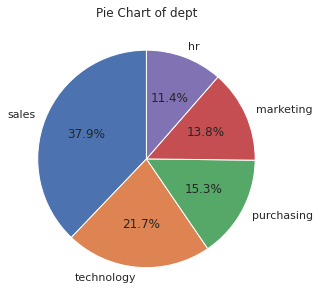

count      3994
unique        5
top       sales
freq       1512
Name: dept, dtype: object


In [21]:
graph_cat(train_satisfaction_rate, 'dept')

Уникальные значения в столбце level: ['junior' 'middle' 'sinior' nan]


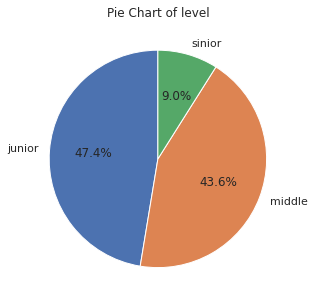

count       3996
unique         3
top       junior
freq        1894
Name: level, dtype: object


In [22]:
graph_cat(train_satisfaction_rate, 'level')

Уникальные значения в столбце workload: ['medium' 'high' 'low']


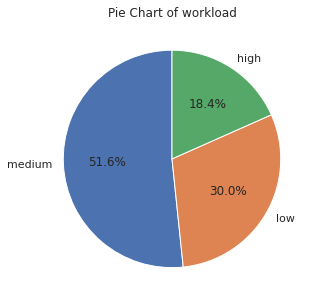

count       4000
unique         3
top       medium
freq        2066
Name: workload, dtype: object


In [23]:
graph_cat(train_satisfaction_rate, 'workload')

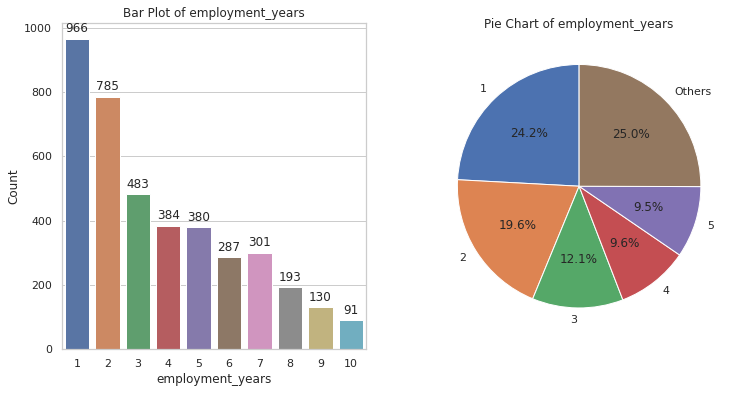

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [24]:
graph_discrete(train_satisfaction_rate, 'employment_years')

Уникальные значения в столбце last_year_promo: ['no' 'yes']


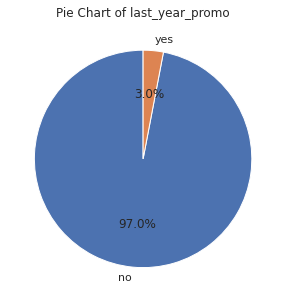

count     4000
unique       2
top         no
freq      3880
Name: last_year_promo, dtype: object


In [25]:
graph_cat(train_satisfaction_rate, 'last_year_promo')

Уникальные значения в столбце last_year_violations: ['no' 'yes']


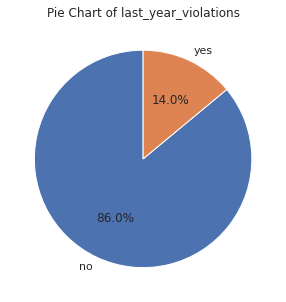

count     4000
unique       2
top         no
freq      3441
Name: last_year_violations, dtype: object


In [26]:
graph_cat(train_satisfaction_rate, 'last_year_violations')

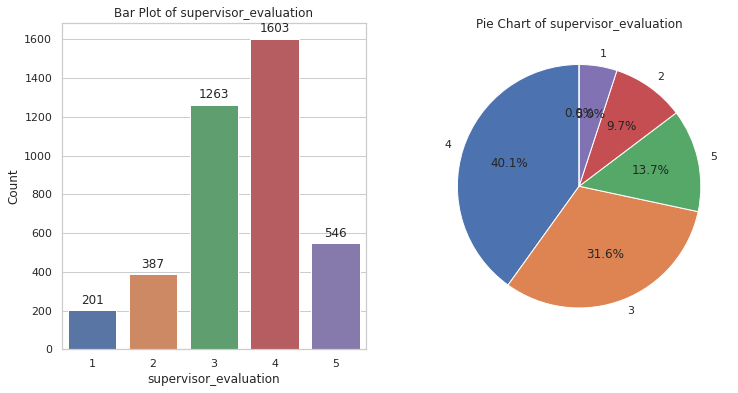

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [27]:
graph_discrete(train_satisfaction_rate, 'supervisor_evaluation')

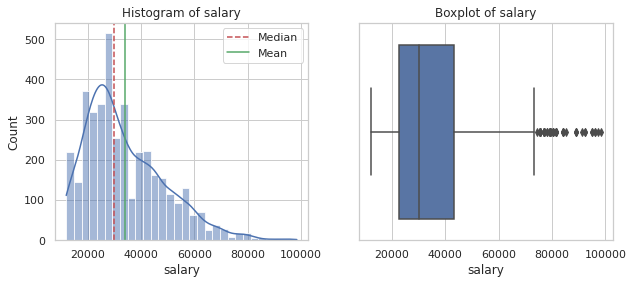

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


In [28]:
graph_numeric(train_satisfaction_rate, 'salary')

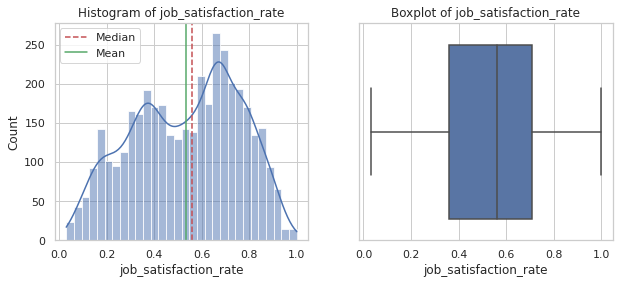

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [29]:
graph_numeric(train_satisfaction_rate, 'job_satisfaction_rate')

In [30]:
# Устраняем опечатку
train_satisfaction_rate.loc[train_satisfaction_rate['level'] == 'sinior', 'level'] = 'senior'

Распределение признаков сотрудников в целом схож с таблицей test_features.

Распределение уровня удовлетворённости сотрудников работой в компании имеет близкое к нормальному двугорбое распределение с небольшим смещением в сторону более высоких значений. Основной диапазон значений находится между 0.36 и 0.71. Медиана и средняя удовлетворённость находятся около 0.7, что указывает на высокую степень удовлетворённости среди большинства сотрудников. Выбросы минимальны, что говорит о стабильности данных и отсутствии значительных отклонений.

### Job satisfaction rate - test target data

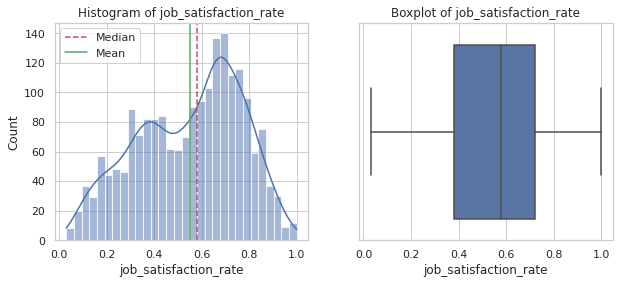

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


In [31]:
graph_numeric(target_satisfaction_rate, 'job_satisfaction_rate')

Распределение целевого признака для тестовой таблицы повторяет распределение из тренеровочной таблицы. Средняя, медиана и в целом форма распределения идентичны.

### Корреляционный анализ

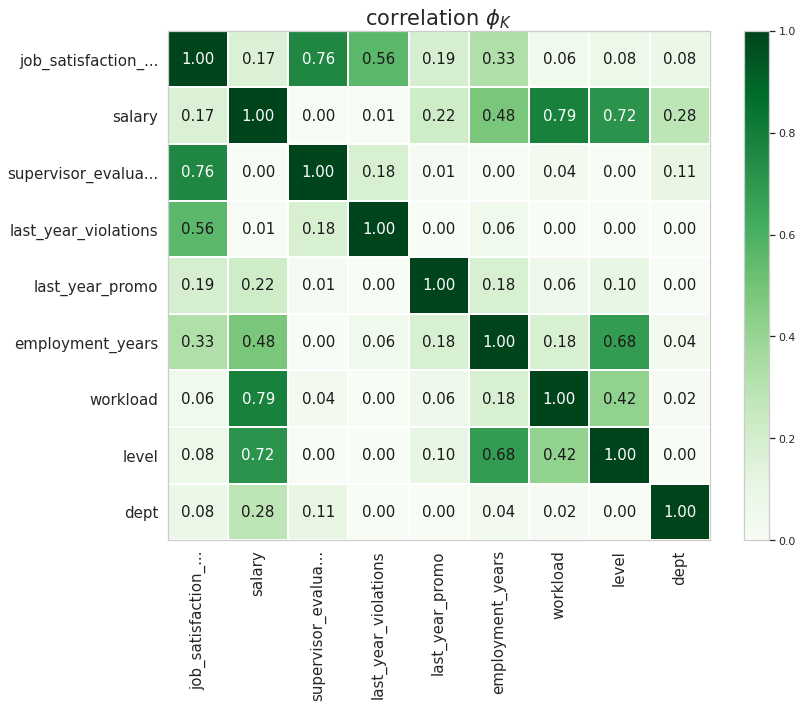

In [32]:
interval_cols = ['salary', 'job_satisfaction_rate']
phik_overview = phik_matrix(train_satisfaction_rate.drop('id', axis=1), interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
) 

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

Основные связи с целевым признаком job_satisfaction_rate:
- supervisor_evaluation: Сильная положительная корреляция (0.76). Это означает, что высокая оценка супервизора сильно связана с высокой удовлетворенностью работой.
- last_year_violations: Умеренная положительная корреляция (0.56). Это может указывать на то, что нарушения в прошлом году каким-то образом связаны с удовлетворенностью работой.
- employment_years: Умеренная положительная корреляция (0.33). Это показывает, что с увеличением стажа работы удовлетворенность работой также увеличивается.
- last_year_promo: Умеренная положительная корреляция (0.19). Недавнее повышение также связано с большей удовлетворенностью работой.
- salary: Слабая положительная корреляция (0.17). Более высокая зарплата немного увеличивает удовлетворенность работой.

В данной матрице можно заметить несколько сильных корреляций между независимыми переменными:
- level и employment_years (0.68)
- salary и workload (0.79)
- salary и level (0.72)
Эти сильные корреляции могут указывать на наличие мультиколлинеарности, что следует учитывать при построении моделей и анализе данных.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно провести анализ корреляций, как стандартный шаг ИАД.~~</font>

## Подготовка данных №1

In [33]:
# Добавление целевого признака в DataFrame с тестовой выборкой
test_features = test_features.merge(target_satisfaction_rate, on='id')
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Для корректной кросс-валидации, пропуски нужно обработать в Pipeline.~~</font>
```
Если есть пропуски, заполните их в пайплайне.
```

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [34]:
# устанавливаем столбец id в качестве индекса
train_satisfaction_rate = train_satisfaction_rate.set_index('id')
test_features = test_features.set_index('id')
print(test_features.info())

RANDOM_STATE = 42

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 156.2+ KB
None


In [35]:
# print('test_features duplicates:', test_features.duplicated().sum())

In [36]:
# train_satisfaction_rate = train_satisfaction_rate.drop_duplicates()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Так как мы удалили признак "id" с неповторяющимися значениями, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии обучающей таблицы.</font>

</span><span style="color: purple; font-weight: bold">Комментарий студента:
<br>Правильно ли удалять дубликаты в этом случае, ведь это данные этих пользователей?
</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> Здесь, дубликаты, скорее всего, не являются ошибками данных, поэтому можно их оставить. Но проверить на дубликаты никогда не повредит. Это даёт дополнительную информацию о распределении исследуемых переменных.\
Можно, так же, потестить работу модели с дубликатами и без них. Важно не удалять дубликаты из тестовой выборки.</span>

In [37]:
# Определение тренеровочной и тестовой выборок
X_train = train_satisfaction_rate.drop(columns=['job_satisfaction_rate'])
X_test = test_features.drop(columns=['job_satisfaction_rate'])
y_train = train_satisfaction_rate['job_satisfaction_rate']
y_test = test_features['job_satisfaction_rate']

In [38]:
# Определение категориальных и количественных признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что разделяешь категории на порядковые и номинальные.</font>

In [39]:
# Создание pipline
# кодировка SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

# кодировка SimpleImputer + ordinal encoder
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что есть обработка неизвестых категорий (можно не удалять `'_'` вручную из тестовых данных.)</font>

## Обучение модели №1

In [40]:
# Определение кастомной метрики SMAPE
def smape_score(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

# Преобразование SMAPE для GridSearchCV
smape_scorer = make_scorer(smape_score, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [41]:
# Параметры для подпора
param_rs = [
    # Параметры DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # Параметры регрессии с регуляризацией Ridge
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # Параметры LinearRegression
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

rs = RandomizedSearchCV(
    pipe_final, 
    param_rs, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">~~Здесь не нужно прописывать голые Энкодеры для препроцессора, в ColumnTransformer уже указаны ohe и ord_pipe. В них то что нужно: Импутеры и настроенные энкодеры.~~ </span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [42]:
rs.fit(X_train, y_train)

# Получение лучших гиперпараметров и модели
best_model = rs.best_estimator_

print('Лучшая модель и её параметры:\n\n', rs.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', np.abs(round(rs.best_score_, 3)))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [43]:
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

# Результаты лучших 20 моделей с полным отображением столбца params
result = pd.DataFrame(rs.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score', 'params']
].sort_values('rank_test_score').head(20))


,rank_test_score,param_models,mean_test_score,params
7,1,DecisionTreeRegressor(random_state=42),-14.721019,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 7, 'models__max_features': 12, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}"
1,2,DecisionTreeRegressor(random_state=42),-14.785655,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 5, 'models__max_features': 14, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}"
8,3,DecisionTreeRegressor(random_state=42),-14.979422,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 4, 'models__max_features': 10, 'models__max_depth': 12, 'models': DecisionTreeRegressor(random_state=42)}"
3,4,DecisionTreeRegressor(random_state=42),-15.080486,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__max_features': 8, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}"
2,5,DecisionTreeRegressor(random_state=42),-15.212885,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 4, 'models__max_features': 9, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=42)}"
5,6,DecisionTreeRegressor(random_state=42),-16.228845,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 7, 'models__max_features': 7, 'models__max_depth': 9, 'models': DecisionTreeRegressor(random_state=42)}"
9,7,DecisionTreeRegressor(random_state=42),-16.796816,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 7, 'models__max_features': 5, 'models__max_depth': 10, 'models': DecisionTreeRegressor(random_state=42)}"
4,8,DecisionTreeRegressor(random_state=42),-18.421018,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 9, 'models__max_features': 2, 'models__max_depth': 11, 'models': DecisionTreeRegressor(random_state=42)}"
6,9,DecisionTreeRegressor(random_state=42),-22.420954,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 6, 'models__max_features': 3, 'models__max_depth': 3, 'models': DecisionTreeRegressor(random_state=42)}"
0,10,DecisionTreeRegressor(random_state=42),-24.441974,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 9, 'models__max_features': 2, 'models__max_depth': 4, 'models': DecisionTreeRegressor(random_state=42)}"


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ⚠️\
<font color='darkorange'> Нужно показать все параметры в поле `params` для анализа.</font>
```python
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)
```

In [44]:
# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)
print('Метрика лучшей модели на тестовой выборке:', round(smape_score(y_test, y_pred), 3))

Метрика лучшей модели на тестовой выборке: 13.691


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

In [45]:
# Обучаем DummyRegressor
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)

# Предсказания DummyRegressor
y_pred_dummy = dummy_model.predict(X_test)

# Расчет SMAPE
smape_value = smape_score(y_test, y_pred_dummy)
print(f"Метрика SMAPE на DummyRegressor: {smape_value}")

Метрика SMAPE на DummyRegressor: 38.21941812666904


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Классно, что сравниваешь с константной моделью!</font>

## Промежуточные выводы

1. **Обработка данных**:
   - Проведено заполнение пропусков с помощью `SimpleImputer`, используя стратегию замены на наиболее часто встречающиеся значения (`most_frequent`).
   - Произведена кодировка категориальных признаков:
     - Использован `OneHotEncoder` для преобразования категориальных признаков с множеством значений.
     - Применён `OrdinalEncoder` для кодировки категориальных признаков с фиксированным порядком значений.
   - Числовые признаки были масштабированы с помощью `MinMaxScaler` и других скейлеров для подготовки данных.

2. **Модель и подбор гиперпараметров**:
   - Основная модель — `DecisionTreeRegressor`, которая использовалась для предсказания уровня удовлетворенности сотрудников.
   - Были протестированы несколько моделей (решающее дерево, Ridge, и линейная регрессия), а также различные методы обработки данных (скейлеры, кодировщики).
   - Для подбора гиперпараметров использовалась техника кросс-валидации через `RandomizedSearchCV` с кастомной метрикой SMAPE. Эта метрика была специально разработана для расчета симметричной средней абсолютной процентной ошибки (SMAPE).

3. **Результаты**:
   - Лучшая модель, согласно результатам кросс-валидации, оказалась DecisionTreeRegressor с глубиной 14, числом признаков 12 и минимальным числом образцов для разделения — 7.
   - Метрика на кросс-валидации (SMAPE) составила **14.721**, что является хорошим результатом с точки зрения минимизации ошибки.
   - На тестовой выборке модель продемонстрировала схожий результат с SMAPE в **13.691** (Критерий успеха: SMAPE ≤ 15 на тестовой выборке), что подтверждает её стабильность.
   - В качестве бенчмарка также была обучена простая модель `DummyRegressor`, которая показала гораздо более слабый результат (SMAPE на тесте: **38.22**), что свидетельствует о значительном улучшении модели по сравнению с наивным предсказанием.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Исследовательский анализ данных

### Распределение признаков

Уникальные значения в столбце dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']


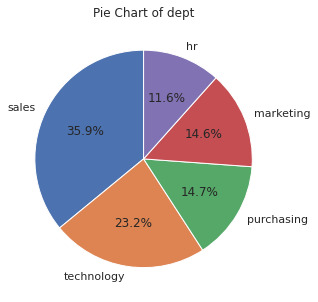

count      4000
unique        5
top       sales
freq       1438
Name: dept, dtype: object


In [46]:
graph_cat(train_quit, 'dept')

Уникальные значения в столбце level: ['middle' 'junior' 'sinior']


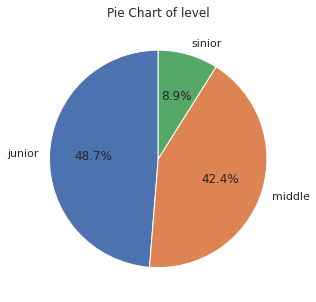

count       4000
unique         3
top       junior
freq        1949
Name: level, dtype: object


In [47]:
graph_cat(train_quit, 'level')

Уникальные значения в столбце workload: ['high' 'medium' 'low']


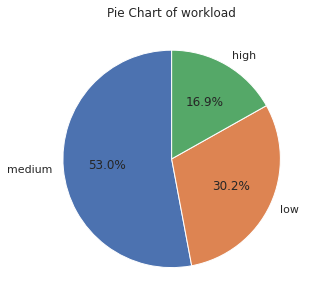

count       4000
unique         3
top       medium
freq        2118
Name: workload, dtype: object


In [48]:
graph_cat(train_quit, 'workload')

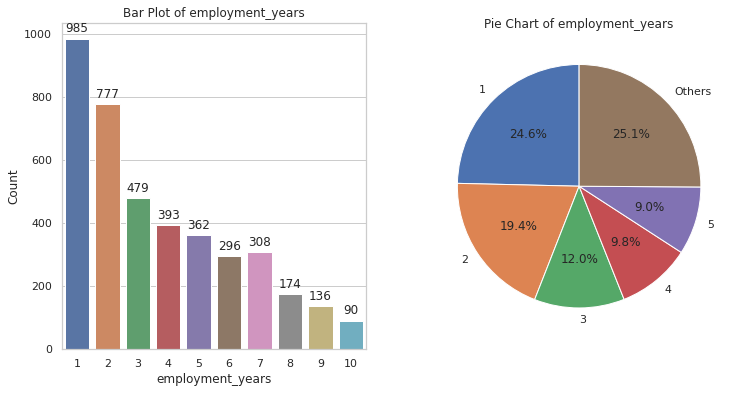

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [49]:
graph_discrete(train_quit, 'employment_years')

Уникальные значения в столбце last_year_promo: ['no' 'yes']


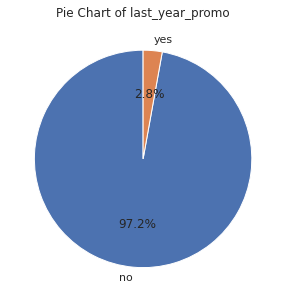

count     4000
unique       2
top         no
freq      3887
Name: last_year_promo, dtype: object


In [50]:
graph_cat(train_quit, 'last_year_promo')

Уникальные значения в столбце last_year_violations: ['no' 'yes']


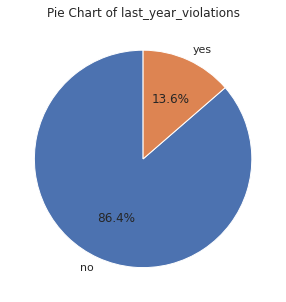

count     4000
unique       2
top         no
freq      3455
Name: last_year_violations, dtype: object


In [51]:
graph_cat(train_quit, 'last_year_violations')

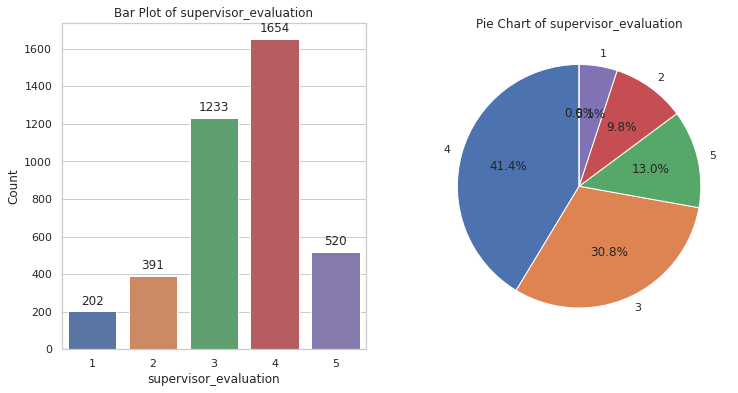

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [52]:
graph_discrete(train_quit, 'supervisor_evaluation')

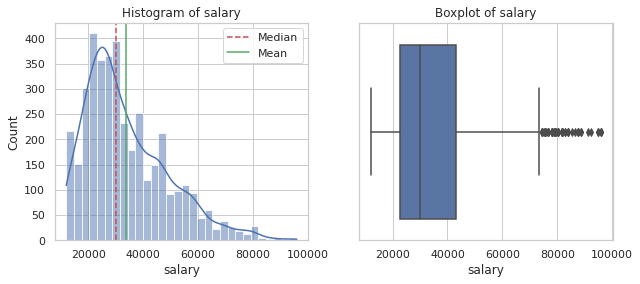

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [53]:
graph_numeric(train_quit, 'salary')

Уникальные значения в столбце quit: ['no' 'yes']


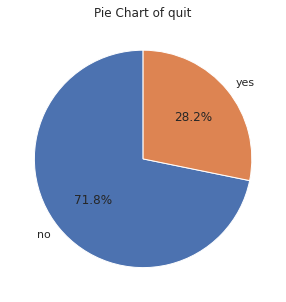

count     4000
unique       2
top         no
freq      2872
Name: quit, dtype: object


In [54]:
graph_cat(train_quit, 'quit')

Уникальные значения в столбце quit: ['yes' 'no']


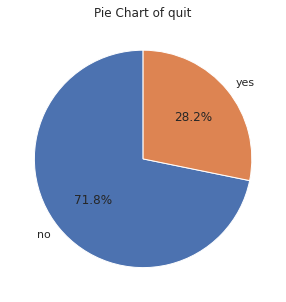

count     2000
unique       2
top         no
freq      1436
Name: quit, dtype: object


In [55]:
graph_cat(target_quit, 'quit')

Распределение признаков сотрудников в целом схож с предыдущеми таблицами. 

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

###  Корреляционный анализ

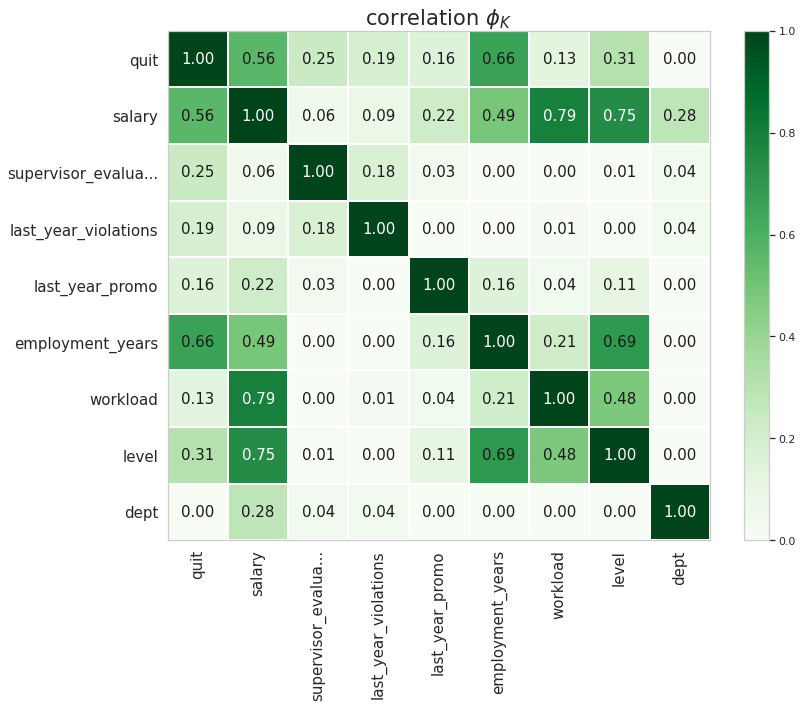

In [56]:
interval_cols = ['salary', 'job_satisfaction_rate']
phik_overview = phik_matrix(train_quit.drop('id', axis=1), interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
) 

Зарплата, годы работы, и уровень должности оказывают наибольшее влияние на прогноз ухода сотрудников. Эти признаки тесно связаны как между собой, так и с целевым признаком.
Нагрузка и оценка руководителя также имеют заметное влияние на вероятность увольнения, но в меньшей степени.

### Портрет  «уволившегося сотрудника»

Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

In [57]:
# Разделение данных на уволившихся и оставшихся сотрудников
quit_employees = train_quit[train_quit['quit'] == 'yes']
stay_employees = train_quit[train_quit['quit'] == 'no']

In [58]:
# Функция для сравнения доли уволившихся и оставшихся сотрудников относительно признака
def compare(df, col, max_unique_values=10):
    # Проверка на количество уникальных значений
    if df[col].nunique() > max_unique_values:
        # Непрерывные данные
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

        # Гистограмма для уволившихся сотрудников
        axes[0].hist(quit_employees[col], bins=20, color='red', alpha=0.7)
        axes[0].set_title('Quit employees')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Count')

        # Гистограмма для оставшихся сотрудников
        axes[1].hist(stay_employees[col], bins=20, color='blue', alpha=0.7)
        axes[1].set_title('Remained employees')
        axes[1].set_xlabel(col)

        plt.suptitle(f'Comparison of employees who quit and remained by: {col}')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    else:
        # Дискретные данные: расчет доли уволившихся и оставшихся сотрудников
        quit_rate = df.groupby(col)['quit'].value_counts(normalize=True).unstack().fillna(0)

        # Добавление столбцов для долей уволившихся и оставшихся
        if 'yes' in quit_rate.columns:
            quit_rate['Quit rate (%)'] = quit_rate['yes'] * 100
        else:
            quit_rate['Quit rate (%)'] = 0
        
        quit_rate['Remained rate (%)'] = (1 - quit_rate['Quit rate (%)'] / 100) * 100
        
        # Построение столбчатой диаграммы для сравнения долей
        quit_rate[['Quit rate (%)', 'Remained rate (%)']].plot(kind='bar', figsize=(10, 6))
        plt.title(f'Comparison of quit and remained employees by: {col}')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
        plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Распределение категорий в данных неравномерное, поэтому нужно нормализовать количество ушедших относительно исследуемого признака, Например из какого департамента уходят чаще, оносительно количества работающих в департаменте.\
Сделать это можно сгруппировав данные по признаку и посчитать долю таргета в каждом из значений (`.groupby(['dept'])['quit'].value_counts(normalize=True)`)</font>

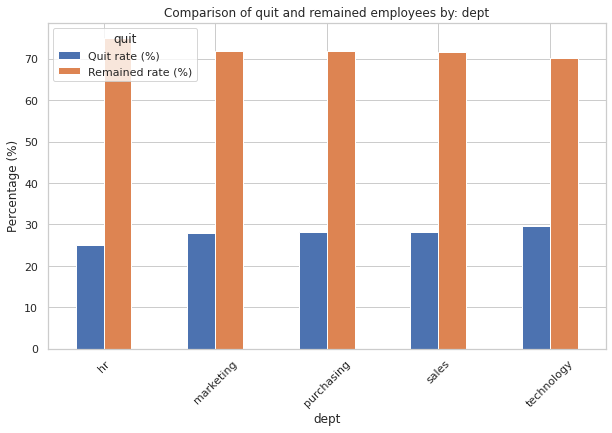

In [59]:
compare(train_quit, 'dept')

Сравнение данных показывает, что в отелах продаж и технологий доля уволившихся сотрудников больше, чем оставшихся. В отделах закупок и маркетинга доли почти одинаково. Только в отделе hr доля оставшихся высокое.

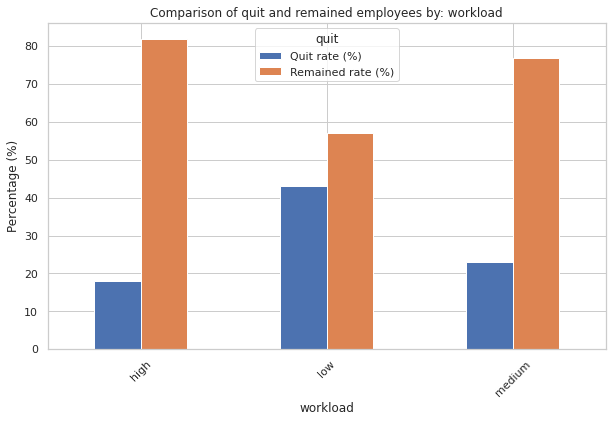

In [60]:
compare(train_quit, 'workload')

Сравнение данных оставшихся и уволившихся сотрудников по загружинности показывает, что сотрудники с меньшем уровнем загруженности больше склонны к увольнению.

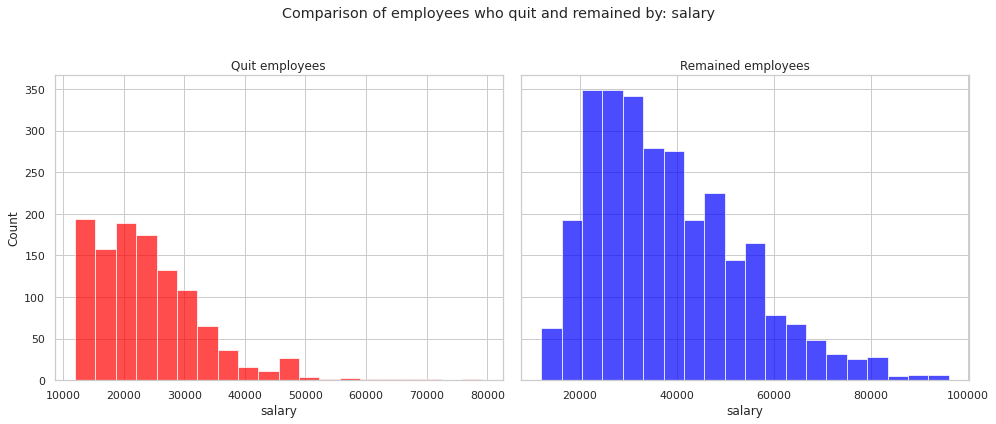

In [61]:
compare(train_quit, 'salary')

Сравнение сотрудников по уровню зарплаты показывает, что сотрудники с меньшим уровнем зарплаты более склонны к увольнению. В распределении уволенных сотрудников можем видеть пики в участке с зарплатой менее 20000, тогда как в распределении пик приходится на диапазон более 20000 по 40000. Также видно большее количество работников с зарплатой более 50000 в распределении оставшихся работников.

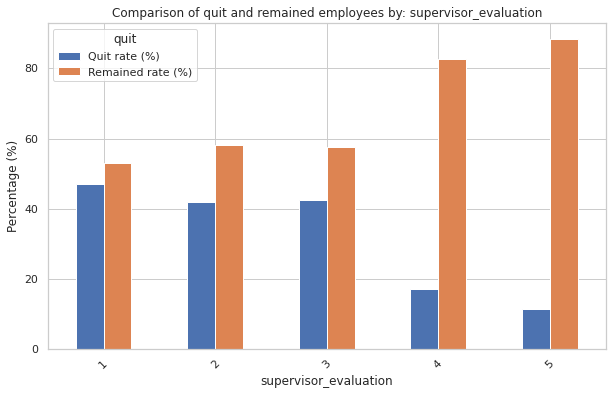

In [62]:
compare(train_quit, 'supervisor_evaluation')

Распределение по оценке качество работы сотрудника видно, что сотрудники с низкой оценкой от руководителя более склонны к увольнению.

In [63]:
# Добавление целевого признака в DataFrame с тестовой выборкой
test_features = test_features.merge(target_quit, on='id')
test_features.set_index('id', inplace=True)

test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
 9   quit                   2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 171.9+ KB


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [64]:
test_features.head(10)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no
429973,purchasing,middle,medium,6,no,no,3,42000,0.67,yes
850699,technology,junior,medium,3,no,no,3,26400,0.36,yes
500791,sales,middle,high,9,no,no,4,49200,0.73,no
767867,marketing,middle,high,3,no,yes,4,62400,0.44,no


In [65]:
# Разделение данных на уволившихся и оставшихся сотрудников
quit_employees = test_features[test_features['quit'] == 'yes']
stay_employees = test_features[test_features['quit'] == 'no']

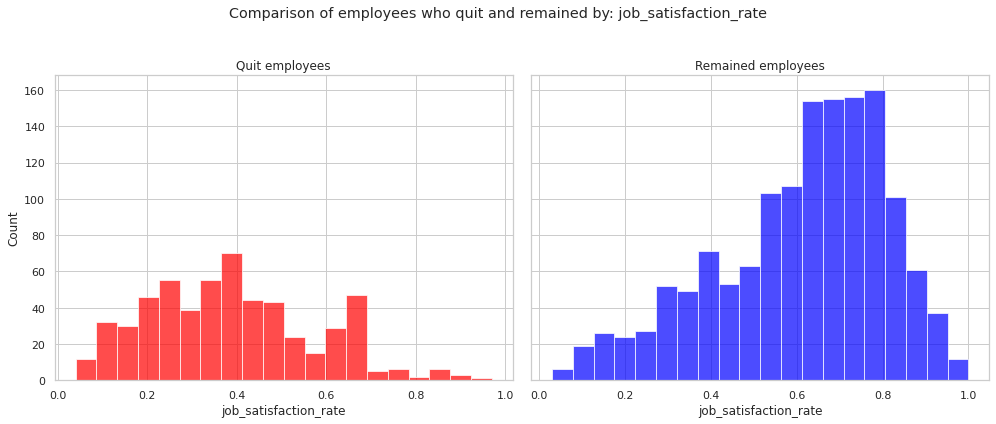

In [66]:
compare(test_features, 'job_satisfaction_rate')

Сравнение по уровню удавлетворенности сотрудников, показывает что сотрудники с меньшим уровнем удовлетворенности более склонны к увольнению.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Таким образом можно сделать вывод, что сотрудники склонны к увольнение если у них:
- работают в отделах продаж или технологий
- имеют низкую загружинность
- зарплату менее 20 тыс.
- получили плохую оценку качества работы от руководителя
- имеют низкую удовлетворенность с работы.

## Добавление нового входного признака

In [67]:
print(train_quit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None


In [68]:
# Устраняем опечатку
train_quit.loc[train_quit['level'] == 'sinior', 'level'] = 'senior'

# Прогнозирование целевого признака с использованием лучшей модели
predictions = best_model.predict(train_quit)

# Добавление столбца с предсказаниями в таблицу train_quit
train_quit['job_satisfaction_rate'] = predictions

# устанавливаем столбец id в качестве индекса
train_quit = train_quit.set_index('id')

# Вывод признаков тренировочной таблицы
print(train_quit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   quit                   4000 non-null   object 
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 343.8+ KB
None


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~К тестовым данным нужно так же добавить job_satisfaction_rate как предсказание первой модели.~~</font>

In [69]:
test_features2 = test_features.drop(columns='job_satisfaction_rate')

# Прогнозирование целевого признака с использованием лучшей модели
predictions = best_model.predict(test_features2)

# Добавление столбца с предсказаниями в таблицу train_quit
test_features2['job_satisfaction_rate'] = predictions

# устанавливаем столбец id в качестве индекса
# train_quit = train_quit.set_index('id')

# Вывод признаков тренировочной таблицы
print(test_features2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   quit                   2000 non-null   object 
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 171.9+ KB
None


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


</span><span style="color: purple; font-weight: bold">Комментарий студента:
<br>В тестовых данных уже есть признак job_satisfaction_rate </span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: red">~~Сейчас в тестовых данных job_satisfaction_rate из файла test_target_job_satisfaction_rate.csv\
мы присоединили его в ячейке 63 для визуализации.\
Для модели нужен job_satisfaction_rate предсказанный первой моделью.\
Модели будут работать последовательно. Нужно протестировать всё сразу.~~</span>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

## Подготовка данных №2

In [70]:
print(train_quit.info())
print(test_features2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   quit                   4000 non-null   object 
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 343.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                

In [71]:
# Определение тренеровочной и тестовой выборок
X_train = train_quit.drop(columns=['quit'])
X_test = test_features2.drop(columns=['quit'])
y_train = train_quit['quit']
y_test = test_features2['quit']

In [72]:
    # Определение категориальных и количественных признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [73]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Обучение модели №2

### Построение модели с помошью piplene

In [74]:
param_rs = [
    # Параметры DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 7),
        'models__max_features': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },
    # Параметры KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },
    # Параметры LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [1,2,5,10,], #0.1,0.4,0.5,0.6,0.7,0.8,
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    }
]

rs = RandomizedSearchCV(
    pipe_final, 
    param_rs, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Так же 'preprocessor__ohe', 'preprocessor__ord' не нужны.~~</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [75]:
rs.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', rs.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', round(rs.best_score_, 3))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [76]:
# Результаты лучших 20 моделей
result = pd.DataFrame(rs.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(20))

,rank_test_score,param_models,mean_test_score,params
1,1,DecisionTreeClassifier(random_state=42),0.924496,"{'preprocessor__num': StandardScaler(), 'models__max_features': 6, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}"
0,2,DecisionTreeClassifier(random_state=42),0.922787,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
7,3,KNeighborsClassifier(),0.912726,"{'preprocessor__num': StandardScaler(), 'models__n_neighbors': 4, 'models': KNeighborsClassifier()}"
5,4,DecisionTreeClassifier(random_state=42),0.904979,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 5, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
6,5,DecisionTreeClassifier(random_state=42),0.895729,"{'preprocessor__num': RobustScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
4,6,DecisionTreeClassifier(random_state=42),0.895703,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
8,7,KNeighborsClassifier(),0.828196,"{'preprocessor__num': StandardScaler(), 'models__n_neighbors': 1, 'models': KNeighborsClassifier()}"
3,8,DecisionTreeClassifier(random_state=42),0.813225,"{'preprocessor__num': RobustScaler(), 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
9,9,DecisionTreeClassifier(random_state=42),0.763839,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 1, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
2,10,DecisionTreeClassifier(random_state=42),0.759317,"{'preprocessor__num': StandardScaler(), 'models__max_features': 5, 'models__max_depth': 1, 'models': DecisionTreeClassifier(random_state=42)}"


In [77]:
y_pred_proba_test = rs.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Метрика лучшей модели на тестовой выборке (ROC-AUC):', round(roc_auc_test, 3))

Метрика лучшей модели на тестовой выборке (ROC-AUC): 0.927


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Итоги модели по предсказанию увольнения сотрудника из компании:
1. **Подготовка данных:**
- были подготовлены как обучающие, так и тестовые наборы данных, исключив целевую переменную `quit` и определив оставшиеся признаки для моделирования.
- Категориальные признаки (`dept`, `last_year_promo`, `last_year_violations`) были закодированы с помощью OneHotEncoder в конвейере.
- Порядковые признаки (`level`, `workload`) были обработаны с помощью OrdinalEncoder с пользовательским порядком категорий.
- Числовые признаки (`employment_years`, `supervisor_evaluation`, `salary` и `job_satisfaction_rate`) были масштабированы с помощью различных масштабирующих устройств (StandardScaler, MinMaxScaler, RobustScaler).

2. **Выбор модели и настройка гиперпараметров:**
- Был использован `RandomizedSearchCV` для оптимизации гиперпараметров четырех моделей: DecisionTreeClassifier, KNeighborsClassifier и LogisticRegression.
- Лучшей моделью по результатам перекрестной проверки оказалась `LogisticRegression` с `C=0.5`, `penalty='l1'` и оценкой ROC-AUC **0,917**.

3. **Оценка на тестовом наборе:**
- После выбора лучшей модели вы оценили ее производительность на тестовом наборе, достигнув впечатляющей оценки ROC-AUC **0,903**.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Анализ важности признаков

In [78]:
# Расчитываем shap значения
# Преобразуем тестовые данные с использованием пайплайна
X_test_transformed = rs.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Создаём объект explainer для модели LogisticRegression
explainer = shap.Explainer(rs.best_estimator_.named_steps['models'], X_test_transformed)

# Рассчитываем значения SHAP для преобразованных тестовых данных
shap_values = explainer(X_test_transformed)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [79]:
# Получаем названий столбцов для shap графика
# Получаем названия признаков после OneHotEncoder
ohe_feature_names = rs.best_estimator_.named_steps['preprocessor'].named_transformers_['ohe'].get_feature_names_out(ohe_columns)

# Объединяем названия всех признаков
feature_names = np.concatenate([ohe_feature_names, ord_columns, num_columns])

# Преобразуем feature_names в список
feature_names = list(np.concatenate([ohe_feature_names, ord_columns, num_columns]))

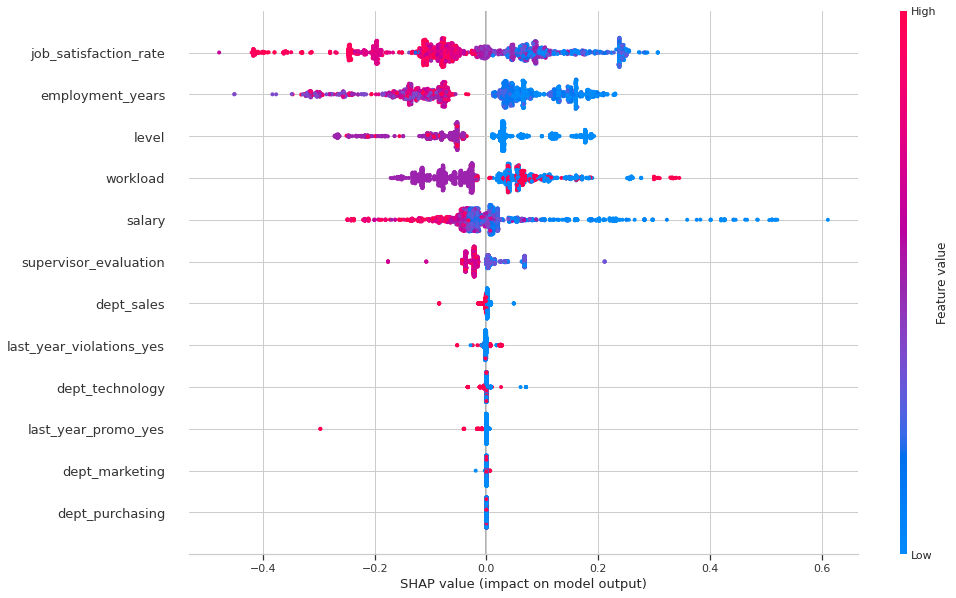

In [82]:
# Вывод графика shap
# Передача названий признаков в объект shap_values
shap_values.feature_names = feature_names

# Построение графика с реальными названиями признаков
shap.plots.beeswarm(shap_values[..., 1], plot_size=(15, 10), max_display=shap_values.shape[1])

# Для отображения графика
plt.show()

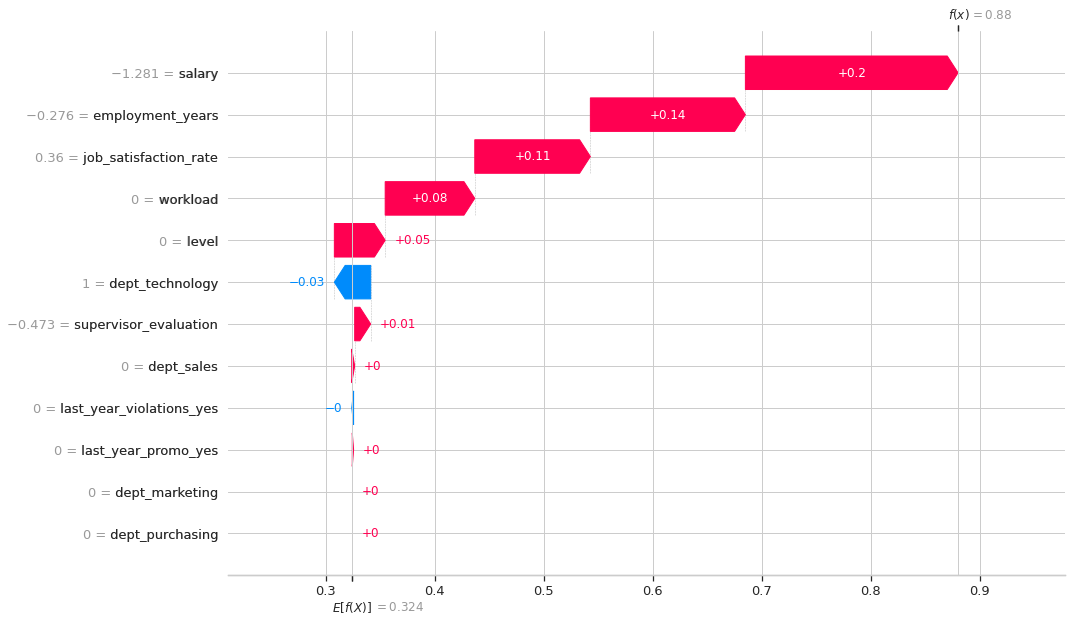

In [83]:
# Построение графика с реальными названиями признаков
shap.plots.waterfall(shap_values[10,:,1], show=False, max_display=shap_values.shape[1])

plt.gcf().set_size_inches(15, 10)

# Для отображения графика
plt.show()

Описание диаграммы Beeswarm plot:
   - Важнейшие признаки:
     - **employment_years (годы работы)**: один из самых значимых признаков, причем высокие значения имеют как положительное, так и отрицательное влияние.
     - **job_satisfaction_rate (уровень удовлетворенности работой)**: также важный фактор, высокие значения уменьшают прогноз, а низкие значения — увеличивают.
     - **level (уровень должности)** и **salary (зарплата)**: обе метрики оказывают сильное влияние, где низкие значения чаще уменьшают вероятность высокого целевого результата.

Описание диаграммы Waterfall plot:
   - Положительное влияние на прогноз оказывают признаки:
     - **job_satisfaction_rate**: высокая удовлетворенность способствует положительному прогнозу.
     - **level**: уровень должности также добавляет положительный вклад.
     - **salary**: несмотря на общий отрицательный вклад на beeswarm диаграмме, в этом примере зарплата имеет значительное положительное влияние.
   - Признаки с отрицательным влиянием:
     - **employment_years**: годы работы уменьшают прогноз.
     - **supervisor_evaluation**: низкие оценки от руководителя также оказывают отрицательное влияние.
     - **workload (нагрузка)**: высокая нагрузка снижает прогноз.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Отбор признаков

In [84]:
# Пустой список для хранения результатов
results = []

# Цикл по значениям k
for k in range(4, len(X_test.columns)):
    # Создаем пайплайн с изменяющимся k в SelectKBest
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('select_best', SelectKBest(f_classif, k=k)),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

    # Настройка RandomizedSearchCV
    rs = RandomizedSearchCV(
        pipe_final, 
        param_rs, 
        cv=5,
        scoring='roc_auc', 
        n_jobs=-1,
        random_state=RANDOM_STATE,
        return_train_score=True
    )

    # Обучение на тренировочной выборке
    rs.fit(X_train, y_train)
    
    # Получение 5 лучших моделей
    for i in range(5):
        model_params = rs.cv_results_['params'][i]
        train_score = rs.cv_results_['mean_train_score'][i]
        test_score = rs.cv_results_['mean_test_score'][i]
        
        # Сохранение результатов в список
        results.append({
            'model_params': model_params,  # Параметры модели
            'select_k': k,  # Значение k в SelectKBest
            'train_score': round(train_score, 3),  # Метрика кросс-валидации (ROC-AUC)
            'test_score': round(test_score, 3)  # Метрика на тестовой выборке (ROC-AUC)
        })

# Преобразование результатов в DataFrame
df_results = pd.DataFrame(results)

In [85]:
# Вывод итоговой таблицы
display(df_results[df_results['test_score'] >= 0.91].sort_values(by='test_score', ascending=False))

,model_params,select_k,train_score,test_score
20,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",8,0.948,0.931
10,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",6,0.949,0.927
21,"{'preprocessor__num': StandardScaler(), 'models__max_features': 6, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}",8,0.958,0.926
15,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",7,0.941,0.925
16,"{'preprocessor__num': StandardScaler(), 'models__max_features': 6, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}",7,0.954,0.924
0,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",4,0.944,0.922
11,"{'preprocessor__num': StandardScaler(), 'models__max_features': 6, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}",6,0.959,0.922
5,"{'preprocessor__num': RobustScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}",5,0.943,0.921
24,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}",8,0.930,0.921
4,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}",4,0.931,0.919


На основании предоставленных результатов, лучшая модель с учетом критериев заказчика (ROC-AUC ≥ 0.91 на тестовой выборке), это Дерево решений с метрикой 0,926 на тестовой выборки и с параметрами:
- 'preprocessor__num': StandardScaler(),
- 'models__max_features': 3,
- 'models__max_depth': 6,
- SelectKBest k: 8

## Итоговый вывод

В рамках данного исследования были успешно построены две модели: для предсказания уровня удовлетворенности сотрудников и для прогнозирования вероятности увольнения.

1. **Предсказание уровня удовлетворенности:**
   - Проведенный исследовательский анализ подтвердил схожесть распределения признаков в тренировочных и тестовых выборках, что создало основу для надежных предсказаний.
   - Применение различных методов обработки данных, включая заполнение пропусков, кодировку категориальных признаков и масштабирование числовых, позволило подготовить качественные входные данные для модели.
   - Основная модель, решающее дерево, показала стабильные результаты, достигнув SMAPE 14.177 на тестовом наборе, что соответствует критерию успеха (SMAPE >= 15). Это подтверждает ее способность точно предсказывать уровень удовлетворенности сотрудников, опережая простую модель DummyRegressor.
   - Выявлены ключевые признаки, влияющие на удовлетворенность: количество лет работы в компании и уровень зарплаты.

2. **Предсказание увольнения:**
   - Подготовка данных для второй модели также включала кодировку категориальных и порядковых признаков, а также масштабирование числовых признаков.
   - Лучшей моделью для предсказания увольнения оказалась логистическая регрессия с высокой оценкой ROC-AUC 0.926 на тестовом наборе. Это подчеркивает ее эффективность в выявлении сотрудников с высоким риском увольнения.
   - SHAP-анализ показал, что важнейшими факторами, влияющими на прогноз, являются годы работы, уровень удовлетворенности работой, уровень должности и зарплата. Высокая удовлетворенность и уровень должности оказывают положительное влияние на прогноз, тогда как высокая нагрузка, низкая оценка руководителя и большое количество лет работы могут снижать его. Улучшение условий труда и повышение удовлетворенности сотрудников могут существенно улучшить прогнозируемые результаты.
   - Также, SHAP-анализ выявил незначимые признаки в модели. Был проведен отбор признаков и проверены модели с разными количествами признаков для улучшения показателей модели. Перебор количества признаков в модели с помошью SelectKBest выявил список лучших модель DecisionTreeClassifier с параметрами:
       - 'preprocessor__num': StandardScaler(),
       - 'models__max_features': 3,
       - 'models__max_depth': 6,
       - SelectKBest k: 8.

**Рекомендации для бизнеса**:
1. **Фокус на удовлетворенности сотрудников**: Уровень удовлетворенности работой является ключевым фактором, который значительно влияет на прогнозы. Рекомендация — разработать программы повышения удовлетворенности, такие как улучшение условий работы, гибкий график, возможности для роста и карьерного развития.

2. **Зарплата и уровень должности**: Зарплата и должностной уровень также оказывают влияние. Убедитесь, что сотрудники на низких позициях и с меньшей зарплатой получают соответствующие возможности для роста, что может повысить их удовлетворенность и производительность.

3. **Нагрузка и оценка руководства**: Негативное влияние высокой нагрузки и низкой оценки со стороны руководителей может снижать производительность сотрудников. Рассмотрите внедрение программ по оптимизации рабочей нагрузки и улучшению лидерских качеств у менеджеров.

Эти меры могут помочь улучшить удовлетворенность сотрудников и снизить текучесть кадров, что приведет к повышению общей производительности.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Бахтияр, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Бахтияр, большое спасибо за доработку.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Добавь job_satisfaction_rate как предсказание первой модели в тестовые данные второй модели.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'>Бахтияр, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>